# 앙상블 모델 (다:다)
* 2개의 모델이 합쳐져서 2개의 모델로 출력되는 경우 

## 1. 데이터

In [1]:
import numpy as np

* 각각 300개씩의 데이터를 가지고 있는 2개의 x 
* 100개의 데이터를 가지고 있는 1개의 y

In [2]:
x1 = np.array([range(1, 101), range(101, 201)])
y1 = np.array([range(1, 101), range(101, 201)])
x2 = np.array([range(501, 601), range(601, 701)])
y2 = np.array([range(501, 601), range(601, 701)])
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(2, 100)
(2, 100)
(2, 100)
(2, 100)


#### 모양 바꿔주기 
* (100, 2) : 행 100, 열 2 

In [3]:
x1 = np.transpose(x1)
y1 = np.transpose(y1)
x2 = np.transpose(x2)
y2 = np.transpose(y2)

print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(100, 2)
(100, 2)
(100, 2)
(100, 2)


#### train, test, validation 분리 
* 8:1:1 로 분리 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=66, test_size=0.2, shuffle=False)
x1_val, x1_test, y1_val, y1_test = train_test_split(x1_test, y1_test, random_state=66, test_size=0.5, shuffle=False)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=66, test_size=0.2, shuffle=False)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, random_state=66, test_size=0.5, shuffle = False)
print('x2_train.shape : ', x2_train.shape)
print('x2_val.shape : ', x2_val.shape)
print('x2_test.shape : ', x2_test.shape)

x2_train.shape :  (80, 2)
x2_val.shape :  (10, 2)
x2_test.shape :  (10, 2)


## 2 모델 구성 

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

#### 서로 다른 2개의 레이어 만들기

In [7]:
input1 = Input(shape=(2,))
dense1 = Dense(100, activation='relu')(input1)
dense1 = Dense(30)(dense1)
dense1 = Dense(7)(dense1)

input2 = Input(shape=(2,))
dense2 = Dense(50, activation='relu')(input2)
dense2 = Dense(30)(dense2)
dense2 = Dense(7)(dense2)

#### 두가지 모델 합치기 

In [8]:
from tensorflow.keras.layers import concatenate

In [9]:
merge1 = concatenate([dense1, dense2])

In [10]:
middle1 = Dense(10)(merge1)
middle2 = Dense(5)(middle1)
middle3 = Dense(30)(middle2)

In [11]:
output1 = Dense(30)(middle3)
output1 = Dense(7)(output1)
output1 = Dense(2)(output1)

In [12]:
output2 = Dense(20)(middle3)
output2 = Dense(70)(output2)
output2 = Dense(2)(output2)

In [13]:
model = Model(inputs = [input1, input2], outputs = [output1, output2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          300         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           150         input_2[0][0]                    
______________________________________________________________________________________________

## 3. 훈련

In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit([x1_train, x2_train], [y1_train, y2_train], epochs=100, batch_size=1, validation_data=([x1_val, x2_val] , [y1_val, y2_val]))

Train on 80 samples, validate on 10 samples
Epoch 1/100
80/80 [==============================] - 1s 14ms/sample - loss: 34903.4876 - dense_11_loss: 2219.0393 - dense_14_loss: 32684.4473 - dense_11_mse: 2219.0393 - dense_14_mse: 32684.4473 - val_loss: 1057.6422 - val_dense_11_loss: 860.5211 - val_dense_14_loss: 197.1210 - val_dense_11_mse: 860.5211 - val_dense_14_mse: 197.1210
Epoch 2/100
80/80 [==============================] - 0s 3ms/sample - loss: 608.2382 - dense_11_loss: 530.3654 - dense_14_loss: 77.8727 - dense_11_mse: 530.3654 - dense_14_mse: 77.8727 - val_loss: 2607.1814 - val_dense_11_loss: 2336.1191 - val_dense_14_loss: 271.0622 - val_dense_11_mse: 2336.1191 - val_dense_14_mse: 271.0622
Epoch 3/100
80/80 [==============================] - 0s 3ms/sample - loss: 651.4201 - dense_11_loss: 593.9297 - dense_14_loss: 57.4903 - dense_11_mse: 593.9297 - dense_14_mse: 57.4903 - val_loss: 580.0054 - val_dense_11_loss: 560.7968 - val_dense_14_loss: 19.2086 - val_dense_11_mse: 560.7968 - 

80/80 [==============================] - 0s 3ms/sample - loss: 0.1267 - dense_11_loss: 0.0601 - dense_14_loss: 0.0666 - dense_11_mse: 0.0601 - dense_14_mse: 0.0666 - val_loss: 0.3178 - val_dense_11_loss: 0.2774 - val_dense_14_loss: 0.0404 - val_dense_11_mse: 0.2774 - val_dense_14_mse: 0.0404
Epoch 28/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.1584 - dense_11_loss: 0.0692 - dense_14_loss: 0.0891 - dense_11_mse: 0.0692 - dense_14_mse: 0.0891 - val_loss: 0.2209 - val_dense_11_loss: 0.1794 - val_dense_14_loss: 0.0416 - val_dense_11_mse: 0.1794 - val_dense_14_mse: 0.0416
Epoch 29/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.2303 - dense_11_loss: 0.0902 - dense_14_loss: 0.1402 - dense_11_mse: 0.0902 - dense_14_mse: 0.1402 - val_loss: 0.2858 - val_dense_11_loss: 0.2067 - val_dense_14_loss: 0.0791 - val_dense_11_mse: 0.2067 - val_dense_14_mse: 0.0791
Epoch 30/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.5053 - dense_11_l

Epoch 54/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.4557 - dense_11_loss: 0.1197 - dense_14_loss: 0.3360 - dense_11_mse: 0.1197 - dense_14_mse: 0.3360 - val_loss: 0.1512 - val_dense_11_loss: 0.0482 - val_dense_14_loss: 0.1031 - val_dense_11_mse: 0.0482 - val_dense_14_mse: 0.1031
Epoch 55/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.3423 - dense_11_loss: 0.1243 - dense_14_loss: 0.2179 - dense_11_mse: 0.1243 - dense_14_mse: 0.2179 - val_loss: 0.4555 - val_dense_11_loss: 0.0317 - val_dense_14_loss: 0.4238 - val_dense_11_mse: 0.0317 - val_dense_14_mse: 0.4238
Epoch 56/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.5027 - dense_11_loss: 0.1117 - dense_14_loss: 0.3910 - dense_11_mse: 0.1117 - dense_14_mse: 0.3910 - val_loss: 0.8274 - val_dense_11_loss: 0.0186 - val_dense_14_loss: 0.8088 - val_dense_11_mse: 0.0186 - val_dense_14_mse: 0.8088
Epoch 57/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.8690

Epoch 81/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.0872 - dense_11_loss: 0.0653 - dense_14_loss: 0.0219 - dense_11_mse: 0.0653 - dense_14_mse: 0.0219 - val_loss: 0.3055 - val_dense_11_loss: 0.2431 - val_dense_14_loss: 0.0625 - val_dense_11_mse: 0.2431 - val_dense_14_mse: 0.0625
Epoch 82/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.0515 - dense_11_loss: 0.0218 - dense_14_loss: 0.0297 - dense_11_mse: 0.0218 - dense_14_mse: 0.0297 - val_loss: 0.2166 - val_dense_11_loss: 0.0181 - val_dense_14_loss: 0.1985 - val_dense_11_mse: 0.0181 - val_dense_14_mse: 0.1985
Epoch 83/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.1117 - dense_11_loss: 0.0161 - dense_14_loss: 0.0957 - dense_11_mse: 0.0161 - dense_14_mse: 0.0957 - val_loss: 0.1029 - val_dense_11_loss: 0.0461 - val_dense_14_loss: 0.0567 - val_dense_11_mse: 0.0461 - val_dense_14_mse: 0.0567
Epoch 84/100
80/80 [==============================] - 0s 3ms/sample - loss: 0.0601

## 4. 학습과정확인 

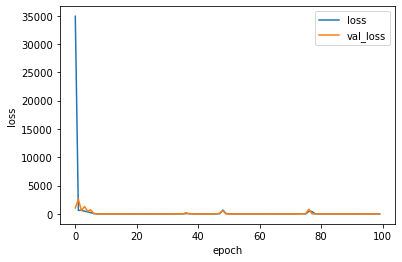

In [15]:
import matplotlib.pyplot as plt
#print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

## 5. 평가 예측

In [16]:
mse = model.evaluate([x1_test, x2_test], [y1_test, y2_test], batch_size=1)
print("mse : ", mse )

10/10 [==============================] - 0s 2ms/sample - loss: 0.9674 - dense_11_loss: 0.3178 - dense_14_loss: 0.6496 - dense_11_mse: 0.3178 - dense_14_mse: 0.6496
mse :  [0.9674274861812592, 0.3178359, 0.64959157, 0.3178359, 0.64959157]


* y1_test : 91에서 100, 191에서 200
* y2_test : 591에서 600, 691에서 700

In [17]:
y1_predict, y2_predict = model.predict([x1_test, x2_test])
print("y1 예측값 : \n", y1_predict, "\n y2 예측값 : \n", y2_predict)

y1 예측값 : 
 [[ 91.02833  190.49353 ]
 [ 92.00755  191.4657  ]
 [ 92.97272  192.42719 ]
 [ 93.9117   193.36871 ]
 [ 94.846695 194.30725 ]
 [ 95.78053  195.24481 ]
 [ 96.71423  196.18234 ]
 [ 97.648026 197.11989 ]
 [ 98.581795 198.0574  ]
 [ 99.515594 198.99501 ]] 
 y2 예측값 : 
 [[591.2311  691.949  ]
 [592.22375 692.9734 ]
 [593.21783 694.002  ]
 [594.21454 695.03845]
 [595.2164  696.08093]
 [596.2199  697.12524]
 [597.2235  698.1698 ]
 [598.227   699.2142 ]
 [599.23047 700.2586 ]
 [600.2342  701.3031 ]]
